# Phishing Detection using Supervised Learning

# Steps followed in the Project:-

  * **Importing Data**
  * **Data Exploration**
  * **Data Engineering**
  * **Data Scaling**
  * **Modelling**
  * **Hypertuning**
  * **Saving The Model**
  * **Metric Analysis**

# Importing

In [1]:
## Importing tools
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sklearn
import pickle

%matplotlib inline

## model evaluation tools
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score,accuracy_score
from sklearn.metrics import roc_curve


## Importing Algoritms 
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.svm import SVC, SVR
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis

# Reading and exploring data

In [2]:
df=pd.read_csv("dataset_phishing.csv")
df.shape

(11430, 89)

In [3]:
df.head()

url  length_url  \
0              http://www.crestonwood.com/router.php          37   
1  http://shadetreetechnology.com/V4/validation/a...          77   
2  https://support-appleld.com.secureupdate.duila...         126   
3                                 http://rgipt.ac.in          18   
4  http://www.iracing.com/tracks/gateway-motorspo...          55   

   length_hostname  ip  nb_dots  nb_hyphens  nb_at  nb_qm  nb_and  nb_or  ...  \
0               19   0        3           0      0      0       0      0  ...   
1               23   1        1           0      0      0       0      0  ...   
2               50   1        4           1      0      1       2      0  ...   
3               11   0        2           0      0      0       0      0  ...   
4               15   0        2           2      0      0       0      0  ...   

   domain_in_title  domain_with_copyright  whois_registered_domain  \
0                0                      1                        0   
1                1                      0                        0   
2                1                      0                        0   
3                1                      0                        0   
4                0                      1                        0   

   domain_registration_length  domain_age  web_traffic  dns_record  \
0                          45          -1            0           1   
1                          77        5767            0           0   
2                          14        4004      5828815           0   
3                          62          -1       107721           0   
4                         224        8175         8725           0   

   google_index  page_rank      status  
0             1          4  legitimate  
1             1          2    phishing  
2             1          0    phishing  
3             0          3  legitimate  
4             0          6  legitimate  

[5 rows x 89 columns]

In [4]:
df=pd.DataFrame(df)
df.head()

url  length_url  \
0              http://www.crestonwood.com/router.php          37   
1  http://shadetreetechnology.com/V4/validation/a...          77   
2  https://support-appleld.com.secureupdate.duila...         126   
3                                 http://rgipt.ac.in          18   
4  http://www.iracing.com/tracks/gateway-motorspo...          55   

   length_hostname  ip  nb_dots  nb_hyphens  nb_at  nb_qm  nb_and  nb_or  ...  \
0               19   0        3           0      0      0       0      0  ...   
1               23   1        1           0      0      0       0      0  ...   
2               50   1        4           1      0      1       2      0  ...   
3               11   0        2           0      0      0       0      0  ...   
4               15   0        2           2      0      0       0      0  ...   

   domain_in_title  domain_with_copyright  whois_registered_domain  \
0                0                      1                        0   
1                1                      0                        0   
2                1                      0                        0   
3                1                      0                        0   
4                0                      1                        0   

   domain_registration_length  domain_age  web_traffic  dns_record  \
0                          45          -1            0           1   
1                          77        5767            0           0   
2                          14        4004      5828815           0   
3                          62          -1       107721           0   
4                         224        8175         8725           0   

   google_index  page_rank      status  
0             1          4  legitimate  
1             1          2    phishing  
2             1          0    phishing  
3             0          3  legitimate  
4             0          6  legitimate  

[5 rows x 89 columns]

In [5]:
print(df.dtypes) # all the data is int except status which needs to be converted into int format

url                object
length_url          int64
length_hostname     int64
ip                  int64
nb_dots             int64
                    ...  
web_traffic         int64
dns_record          int64
google_index        int64
page_rank           int64
status             object
Length: 89, dtype: object


In [6]:
df['status']

0        legitimate
1          phishing
2          phishing
3        legitimate
4        legitimate
            ...    
11425    legitimate
11426      phishing
11427    legitimate
11428    legitimate
11429      phishing
Name: status, Length: 11430, dtype: object

In [7]:
df['status'].value_counts()

legitimate    5715
phishing      5715
Name: status, dtype: int64

### converting the target attribute to 0's and 1's

In [8]:
labels,uniques=pd.factorize(df['status'])

In [9]:
df['status']=labels

In [10]:
uniques

Index(['legitimate', 'phishing'], dtype='object')

In [11]:
df.head()

url  length_url  \
0              http://www.crestonwood.com/router.php          37   
1  http://shadetreetechnology.com/V4/validation/a...          77   
2  https://support-appleld.com.secureupdate.duila...         126   
3                                 http://rgipt.ac.in          18   
4  http://www.iracing.com/tracks/gateway-motorspo...          55   

   length_hostname  ip  nb_dots  nb_hyphens  nb_at  nb_qm  nb_and  nb_or  ...  \
0               19   0        3           0      0      0       0      0  ...   
1               23   1        1           0      0      0       0      0  ...   
2               50   1        4           1      0      1       2      0  ...   
3               11   0        2           0      0      0       0      0  ...   
4               15   0        2           2      0      0       0      0  ...   

   domain_in_title  domain_with_copyright  whois_registered_domain  \
0                0                      1                        0   
1                1                      0                        0   
2                1                      0                        0   
3                1                      0                        0   
4                0                      1                        0   

   domain_registration_length  domain_age  web_traffic  dns_record  \
0                          45          -1            0           1   
1                          77        5767            0           0   
2                          14        4004      5828815           0   
3                          62          -1       107721           0   
4                         224        8175         8725           0   

   google_index  page_rank  status  
0             1          4       0  
1             1          2       1  
2             1          0       1  
3             0          3       0  
4             0          6       0  

[5 rows x 89 columns]

In [12]:
df['status'].value_counts()

0    5715
1    5715
Name: status, dtype: int64

<Axes: >

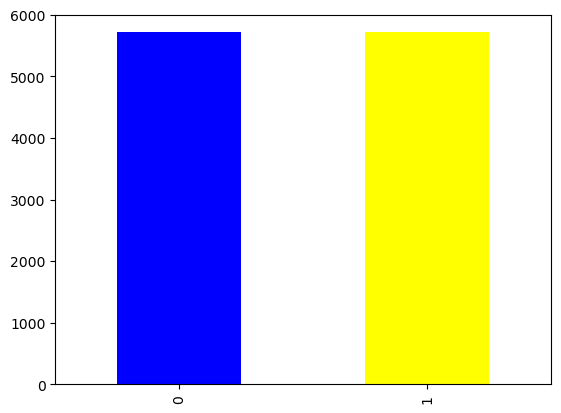

In [13]:
df["status"].value_counts().plot(kind="bar",color=["blue","yellow"])

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11430 entries, 0 to 11429
Data columns (total 89 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   url                         11430 non-null  object 
 1   length_url                  11430 non-null  int64  
 2   length_hostname             11430 non-null  int64  
 3   ip                          11430 non-null  int64  
 4   nb_dots                     11430 non-null  int64  
 5   nb_hyphens                  11430 non-null  int64  
 6   nb_at                       11430 non-null  int64  
 7   nb_qm                       11430 non-null  int64  
 8   nb_and                      11430 non-null  int64  
 9   nb_or                       11430 non-null  int64  
 10  nb_eq                       11430 non-null  int64  
 11  nb_underscore               11430 non-null  int64  
 12  nb_tilde                    11430 non-null  int64  
 13  nb_percent                  114

In [15]:
df.isna().sum()

url                0
length_url         0
length_hostname    0
ip                 0
nb_dots            0
                  ..
web_traffic        0
dns_record         0
google_index       0
page_rank          0
status             0
Length: 89, dtype: int64

In [16]:
## drop na code
df=df.dropna()

In [17]:
df.describe() # to find the mean,median,std,min,max,etc.

length_url  length_hostname            ip       nb_dots  \
count  11430.000000     11430.000000  11430.000000  11430.000000   
mean      61.126684        21.090289      0.150569      2.480752   
std       55.297318        10.777171      0.357644      1.369686   
min       12.000000         4.000000      0.000000      1.000000   
25%       33.000000        15.000000      0.000000      2.000000   
50%       47.000000        19.000000      0.000000      2.000000   
75%       71.000000        24.000000      0.000000      3.000000   
max     1641.000000       214.000000      1.000000     24.000000   

         nb_hyphens         nb_at         nb_qm        nb_and    nb_or  \
count  11430.000000  11430.000000  11430.000000  11430.000000  11430.0   
mean       0.997550      0.022222      0.141207      0.162292      0.0   
std        2.087087      0.155500      0.364456      0.821337      0.0   
min        0.000000      0.000000      0.000000      0.000000      0.0   
25%        0.000000      0.000000      0.000000      0.000000      0.0   
50%        0.000000      0.000000      0.000000      0.000000      0.0   
75%        1.000000      0.000000      0.000000      0.000000      0.0   
max       43.000000      4.000000      3.000000     19.000000      0.0   

              nb_eq  ...  domain_in_title  domain_with_copyright  \
count  11430.000000  ...     11430.000000           11430.000000   
mean       0.293176  ...         0.775853               0.439545   
std        0.998317  ...         0.417038               0.496353   
min        0.000000  ...         0.000000               0.000000   
25%        0.000000  ...         1.000000               0.000000   
50%        0.000000  ...         1.000000               0.000000   
75%        0.000000  ...         1.000000               1.000000   
max       19.000000  ...         1.000000               1.000000   

       whois_registered_domain  domain_registration_length    domain_age  \
count             11430.000000                11430.000000  11430.000000   
mean                  0.072878                  492.532196   4062.543745   
std                   0.259948                  814.769415   3107.784600   
min                   0.000000                   -1.000000    -12.000000   
25%                   0.000000                   84.000000    972.250000   
50%                   0.000000                  242.000000   3993.000000   
75%                   0.000000                  449.000000   7026.750000   
max                   1.000000                29829.000000  12874.000000   

        web_traffic    dns_record  google_index     page_rank        status  
count  1.143000e+04  11430.000000  11430.000000  11430.000000  11430.000000  
mean   8.567566e+05      0.020122      0.533946      3.185739      0.500000  
std    1.995606e+06      0.140425      0.498868      2.536955      0.500022  
min    0.000000e+00      0.000000      0.000000      0.000000      0.000000  
25%    0.000000e+00      0.000000      0.000000      1.000000      0.000000  
50%    1.651000e+03      0.000000      1.000000      3.000000      0.500000  
75%    3.738455e+05      0.000000      1.000000      5.000000      1.000000  
max    1.076799e+07      1.000000      1.000000     10.000000      1.000000  

[8 rows x 88 columns]

In [18]:
pd.crosstab(df.status,df.ip)
pd.crosstab(df.status,df.domain_with_copyright)
pd.crosstab(df.status,df.port)
pd.crosstab(df.status,df.nb_redirection)
pd.crosstab(df.status,df.google_index) # seems important

google_index     0     1
status                  
0             4748   967
1              579  5136

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11430 entries, 0 to 11429
Data columns (total 89 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   url                         11430 non-null  object 
 1   length_url                  11430 non-null  int64  
 2   length_hostname             11430 non-null  int64  
 3   ip                          11430 non-null  int64  
 4   nb_dots                     11430 non-null  int64  
 5   nb_hyphens                  11430 non-null  int64  
 6   nb_at                       11430 non-null  int64  
 7   nb_qm                       11430 non-null  int64  
 8   nb_and                      11430 non-null  int64  
 9   nb_or                       11430 non-null  int64  
 10  nb_eq                       11430 non-null  int64  
 11  nb_underscore               11430 non-null  int64  
 12  nb_tilde                    11430 non-null  int64  
 13  nb_percent                  114

### Heat Map to get some visual idea

In [20]:
## add the plotting of the attributes selected by ayan and taniska
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(200,200))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

C:\Users\KIIT\AppData\Local\Temp\ipykernel_23848\1698413501.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = df.corr()


[1.42073686e-02 1.73866023e-02 4.19338653e-02 1.68087084e-02
 1.38939684e-02 3.64619884e-03 1.70818044e-02 2.70045097e-03
 0.00000000e+00 6.84103855e-03 5.32318441e-03 3.51273974e-04
 1.40864778e-03 1.91163281e-02 4.23509381e-05 1.23803478e-03
 1.93689042e-04 7.50277840e-04 5.13988319e-06 1.30208399e-03
 8.02678264e-02 4.04274975e-03 4.62054003e-04 1.02987743e-03
 9.53646423e-03 1.95454332e-02 1.36225433e-02 4.40543560e-05
 1.61322740e-04 2.13826896e-03 7.73205056e-03 1.97277056e-03
 1.77325232e-02 1.54634173e-02 3.77345171e-03 8.97750314e-03
 1.28114198e-04 1.00403388e-02 1.50388537e-05 1.40607895e-02
 1.23484146e-02 1.32265172e-02 1.63320990e-02 1.25463405e-02
 1.29506722e-02 9.60130671e-03 1.50873065e-02 1.06344250e-02
 1.16781247e-02 1.38455520e-02 3.91720632e-02 1.39790170e-02
 3.21008908e-04 5.47646244e-04 3.97026386e-03 3.31731051e-03
 2.97320999e-02 3.15053388e-02 2.67121242e-02 0.00000000e+00
 8.60688153e-03 0.00000000e+00 1.64638913e-02 0.00000000e+00
 8.88239307e-03 4.270784

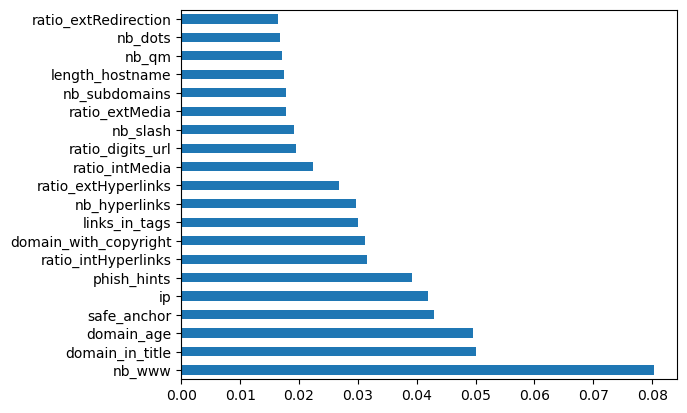

In [21]:
## This code is used to find the most important attributes for us

X = df.iloc[:,1:86]  #independent columns
y = df['status']    #target column i.e price range
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [22]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

X = df.iloc[:,1:80]  #independent columns # @Aradhya Check
y = df['status']    #target column i.e price range
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=40)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(20,'Score'))  #print 10 best features

                 Specs          Score
56       nb_hyperlinks  427921.241938
0           length_url   35328.039045
46   longest_word_path   26076.336884
69      ratio_intMedia   21314.940434
44   longest_words_raw   14504.343935
70      ratio_extMedia   14287.974964
74         safe_anchor   14154.793134
67       links_in_tags   12891.228754
49       avg_word_path    4460.650000
1      length_hostname    3574.909094
50         phish_hints    2785.077416
9                nb_eq    2116.254551
39    length_words_raw    2099.190649
42  shortest_word_host    1760.361475
7               nb_and    1381.779515
20              nb_www    1262.570425
2                   ip    1004.779198
6                nb_qm     931.273854
60           nb_extCSS     773.963326
47       avg_words_raw     759.837488


# First we will Scale the data for the complete data set

## There are two Scaler used to scale the data to same range they are:-
  ##   1)**StandardScaler**
  ##  2)**MinMaxScaler**

In [23]:
df.describe() # since very few attributes have very large difference between there max value and min value adn minmax will bring them all in the range 0-1 without impacting the relationship curve

length_url  length_hostname            ip       nb_dots  \
count  11430.000000     11430.000000  11430.000000  11430.000000   
mean      61.126684        21.090289      0.150569      2.480752   
std       55.297318        10.777171      0.357644      1.369686   
min       12.000000         4.000000      0.000000      1.000000   
25%       33.000000        15.000000      0.000000      2.000000   
50%       47.000000        19.000000      0.000000      2.000000   
75%       71.000000        24.000000      0.000000      3.000000   
max     1641.000000       214.000000      1.000000     24.000000   

         nb_hyphens         nb_at         nb_qm        nb_and    nb_or  \
count  11430.000000  11430.000000  11430.000000  11430.000000  11430.0   
mean       0.997550      0.022222      0.141207      0.162292      0.0   
std        2.087087      0.155500      0.364456      0.821337      0.0   
min        0.000000      0.000000      0.000000      0.000000      0.0   
25%        0.000000      0.000000      0.000000      0.000000      0.0   
50%        0.000000      0.000000      0.000000      0.000000      0.0   
75%        1.000000      0.000000      0.000000      0.000000      0.0   
max       43.000000      4.000000      3.000000     19.000000      0.0   

              nb_eq  ...  domain_in_title  domain_with_copyright  \
count  11430.000000  ...     11430.000000           11430.000000   
mean       0.293176  ...         0.775853               0.439545   
std        0.998317  ...         0.417038               0.496353   
min        0.000000  ...         0.000000               0.000000   
25%        0.000000  ...         1.000000               0.000000   
50%        0.000000  ...         1.000000               0.000000   
75%        0.000000  ...         1.000000               1.000000   
max       19.000000  ...         1.000000               1.000000   

       whois_registered_domain  domain_registration_length    domain_age  \
count             11430.000000                11430.000000  11430.000000   
mean                  0.072878                  492.532196   4062.543745   
std                   0.259948                  814.769415   3107.784600   
min                   0.000000                   -1.000000    -12.000000   
25%                   0.000000                   84.000000    972.250000   
50%                   0.000000                  242.000000   3993.000000   
75%                   0.000000                  449.000000   7026.750000   
max                   1.000000                29829.000000  12874.000000   

        web_traffic    dns_record  google_index     page_rank        status  
count  1.143000e+04  11430.000000  11430.000000  11430.000000  11430.000000  
mean   8.567566e+05      0.020122      0.533946      3.185739      0.500000  
std    1.995606e+06      0.140425      0.498868      2.536955      0.500022  
min    0.000000e+00      0.000000      0.000000      0.000000      0.000000  
25%    0.000000e+00      0.000000      0.000000      1.000000      0.000000  
50%    1.651000e+03      0.000000      1.000000      3.000000      0.500000  
75%    3.738455e+05      0.000000      1.000000      5.000000      1.000000  
max    1.076799e+07      1.000000      1.000000     10.000000      1.000000  

[8 rows x 88 columns]

In [24]:
from sklearn import preprocessing

df = df.drop('url',axis=1)

min_max_scaler = preprocessing.MinMaxScaler()
new_data = min_max_scaler.fit_transform(df)

In [25]:
# converting the scalled data to pandas DataFrame

new_data=pd.DataFrame(new_data)
new_data

0         1    2         3         4     5         6         7   \
0      0.015347  0.071429  0.0  0.086957  0.000000  0.00  0.000000  0.000000   
1      0.039902  0.090476  1.0  0.000000  0.000000  0.00  0.000000  0.000000   
2      0.069982  0.219048  1.0  0.130435  0.023256  0.00  0.333333  0.105263   
3      0.003683  0.033333  0.0  0.043478  0.000000  0.00  0.000000  0.000000   
4      0.026397  0.052381  0.0  0.043478  0.046512  0.00  0.000000  0.000000   
...         ...       ...  ...       ...       ...   ...       ...       ...   
11425  0.020258  0.061905  0.0  0.043478  0.000000  0.00  0.000000  0.000000   
11426  0.044199  0.066667  0.0  0.173913  0.000000  0.25  0.333333  0.000000   
11427  0.057090  0.057143  1.0  0.043478  0.139535  0.00  0.333333  0.000000   
11428  0.015961  0.123810  0.0  0.043478  0.000000  0.00  0.000000  0.000000   
11429  0.285451  0.047619  1.0  1.000000  0.000000  0.25  0.333333  0.473684   

        8         9   ...   78   79   80        81        82            83  \
0      0.0  0.000000  ...  0.0  1.0  0.0  0.001542  0.000854  0.000000e+00   
1      0.0  0.000000  ...  1.0  0.0  0.0  0.002615  0.448471  0.000000e+00   
2      0.0  0.157895  ...  1.0  0.0  0.0  0.000503  0.311656  5.413097e-01   
3      0.0  0.000000  ...  1.0  0.0  0.0  0.002112  0.000854  1.000382e-02   
4      0.0  0.000000  ...  0.0  1.0  0.0  0.007543  0.635341  8.102722e-04   
...    ...       ...  ...  ...  ...  ...       ...       ...           ...   
11425  0.0  0.000000  ...  0.0  0.0  0.0  0.015052  0.419680  3.696142e-04   
11426  0.0  0.052632  ...  1.0  0.0  0.0  0.007107  0.523048  0.000000e+00   
11427  0.0  0.052632  ...  0.0  0.0  0.0  0.094200  0.661726  7.429430e-07   
11428  0.0  0.000000  ...  1.0  0.0  0.0  0.002883  0.221015  2.280364e-01   
11429  0.0  0.473684  ...  1.0  1.0  1.0  0.000034  0.000854  0.000000e+00   

        84   85   86   87  
0      1.0  1.0  0.4  0.0  
1      0.0  1.0  0.2  1.0  
2      0.0  1.0  0.0  1.0  
3      0.0  0.0  0.3  0.0  
4      0.0  0.0  0.6  0.0  
...    ...  ...  ...  ...  
11425  0.0  0.0  0.6  0.0  
11426  0.0  1.0  0.0  1.0  
11427  0.0  1.0  1.0  0.0  
11428  0.0  0.0  0.4  0.0  
11429  1.0  1.0  0.0  1.0  

[11430 rows x 88 columns]

In [26]:
# since the columns names were lost in scaling process so we restore that 

l=df.columns
j=0
for i in df.columns:
    new_data=new_data.rename(columns={j: i})
    j=j+1
    
new_data.head()

length_url  length_hostname   ip   nb_dots  nb_hyphens  nb_at     nb_qm  \
0    0.015347         0.071429  0.0  0.086957    0.000000    0.0  0.000000   
1    0.039902         0.090476  1.0  0.000000    0.000000    0.0  0.000000   
2    0.069982         0.219048  1.0  0.130435    0.023256    0.0  0.333333   
3    0.003683         0.033333  0.0  0.043478    0.000000    0.0  0.000000   
4    0.026397         0.052381  0.0  0.043478    0.046512    0.0  0.000000   

     nb_and  nb_or     nb_eq  ...  domain_in_title  domain_with_copyright  \
0  0.000000    0.0  0.000000  ...              0.0                    1.0   
1  0.000000    0.0  0.000000  ...              1.0                    0.0   
2  0.105263    0.0  0.157895  ...              1.0                    0.0   
3  0.000000    0.0  0.000000  ...              1.0                    0.0   
4  0.000000    0.0  0.000000  ...              0.0                    1.0   

   whois_registered_domain  domain_registration_length  domain_age  \
0                      0.0                    0.001542    0.000854   
1                      0.0                    0.002615    0.448471   
2                      0.0                    0.000503    0.311656   
3                      0.0                    0.002112    0.000854   
4                      0.0                    0.007543    0.635341   

   web_traffic  dns_record  google_index  page_rank  status  
0     0.000000         1.0           1.0        0.4     0.0  
1     0.000000         0.0           1.0        0.2     1.0  
2     0.541310         0.0           1.0        0.0     1.0  
3     0.010004         0.0           0.0        0.3     0.0  
4     0.000810         0.0           0.0        0.6     0.0  

[5 rows x 88 columns]

In [27]:
status=pd.DataFrame()
status=new_data['status']
new_data=new_data.drop('status',axis=1)



# storing the scaled data

In [28]:
sdf=new_data
status

0        0.0
1        1.0
2        1.0
3        0.0
4        0.0
        ... 
11425    0.0
11426    1.0
11427    0.0
11428    0.0
11429    1.0
Name: status, Length: 11430, dtype: float64

In [29]:
# using the scalled data to analyse and identify most important attributes

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

x = new_data.iloc[:,0:87]  #independent columns
y = status    #target column i.e status
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=5)
fit = bestfeatures.fit(x,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(25,'Score'))  #print 20 best features

                    Specs        Score
85           google_index  2847.871702
2                      ip  1004.779198
20                 nb_www   631.285213
86              page_rank   603.251699
30       tld_in_subdomain   473.719023
77            empty_title   428.838710
33          prefix_suffix   420.136560
6                   nb_qm   310.424618
25       ratio_digits_url   301.381630
78        domain_in_title   301.077582
50            phish_hints   278.507742
26      ratio_digits_host   250.760241
82             domain_age   231.578842
55     statistical_report   217.441435
69         ratio_intMedia   213.149404
79  domain_with_copyright   191.943471
31     abnormal_subdomain   183.680162
84             dns_record   167.026087
57    ratio_intHyperlinks   160.054949
70         ratio_extMedia   142.879750
74            safe_anchor   141.547931
66       external_favicon   136.965572
54         suspecious_tld   136.043902
67          links_in_tags   128.912288
35     shortening_service

In [30]:
sdf.describe()

length_url  length_hostname            ip       nb_dots  \
count  11430.000000     11430.000000  11430.000000  11430.000000   
mean       0.030158         0.081382      0.150569      0.064381   
std        0.033946         0.051320      0.357644      0.059552   
min        0.000000         0.000000      0.000000      0.000000   
25%        0.012891         0.052381      0.000000      0.043478   
50%        0.021486         0.071429      0.000000      0.043478   
75%        0.036219         0.095238      0.000000      0.086957   
max        1.000000         1.000000      1.000000      1.000000   

         nb_hyphens         nb_at         nb_qm        nb_and    nb_or  \
count  11430.000000  11430.000000  11430.000000  11430.000000  11430.0   
mean       0.023199      0.005556      0.047069      0.008542      0.0   
std        0.048537      0.038875      0.121485      0.043228      0.0   
min        0.000000      0.000000      0.000000      0.000000      0.0   
25%        0.000000      0.000000      0.000000      0.000000      0.0   
50%        0.000000      0.000000      0.000000      0.000000      0.0   
75%        0.023256      0.000000      0.000000      0.000000      0.0   
max        1.000000      1.000000      1.000000      1.000000      0.0   

              nb_eq  ...   empty_title  domain_in_title  \
count  11430.000000  ...  11430.000000     11430.000000   
mean       0.015430  ...      0.124759         0.775853   
std        0.052543  ...      0.330460         0.417038   
min        0.000000  ...      0.000000         0.000000   
25%        0.000000  ...      0.000000         1.000000   
50%        0.000000  ...      0.000000         1.000000   
75%        0.000000  ...      0.000000         1.000000   
max        1.000000  ...      1.000000         1.000000   

       domain_with_copyright  whois_registered_domain  \
count           11430.000000             11430.000000   
mean                0.439545                 0.072878   
std                 0.496353                 0.259948   
min                 0.000000                 0.000000   
25%                 0.000000                 0.000000   
50%                 0.000000                 0.000000   
75%                 1.000000                 0.000000   
max                 1.000000                 1.000000   

       domain_registration_length    domain_age   web_traffic    dns_record  \
count                11430.000000  11430.000000  11430.000000  11430.000000   
mean                     0.016545      0.316199      0.079565      0.020122   
std                      0.027314      0.241175      0.185328      0.140425   
min                      0.000000      0.000000      0.000000      0.000000   
25%                      0.002849      0.076381      0.000000      0.000000   
50%                      0.008146      0.310802      0.000153      0.000000   
75%                      0.015085      0.546232      0.034718      0.000000   
max                      1.000000      1.000000      1.000000      1.000000   

       google_index     page_rank  
count  11430.000000  11430.000000  
mean       0.533946      0.318574  
std        0.498868      0.253696  
min        0.000000      0.000000  
25%        0.000000      0.100000  
50%        1.000000      0.300000  
75%        1.000000      0.500000  
max        1.000000      1.000000  

[8 rows x 87 columns]

In [31]:
dt=pd.DataFrame()

dt['google_index']=sdf['google_index']
dt['ip']=sdf['ip']
dt["nb_www"]=sdf['nb_www']
dt['page_rank']=sdf['page_rank']
dt['tld_in_subdomain']=sdf['tld_in_subdomain']
dt['empty_title']=sdf['empty_title']
dt['prefix_suffix']=sdf['prefix_suffix']
dt['nb_qm']=sdf['nb_qm']
dt['ratio_digits_url']=sdf['ratio_digits_url']
dt['domain_in_title']=sdf['domain_in_title']
dt['phish_hints']=sdf['phish_hints']
dt['ratio_digits_host']=sdf['ratio_digits_host']
dt['domain_age']=sdf['domain_age']
dt['statistical_report']=sdf['statistical_report']
dt['ratio_intMedia']=sdf['ratio_intMedia']
dt['domain_with_copyright']=sdf['domain_with_copyright']

dt['status']=status

## if necesary add attributes as much needed

In [32]:
dt.shape,status.shape

((11430, 17), (11430,))

In [36]:
tempsv=dt
tempsv['status']=status
tempsv.to_csv('Refined_data.csv', index = False, encoding='utf-8') 

In [33]:
dt.describe()

google_index            ip        nb_www     page_rank  \
count  11430.000000  11430.000000  11430.000000  11430.000000   
mean       0.533946      0.150569      0.224234      0.318574   
std        0.498868      0.357644      0.250956      0.253696   
min        0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.100000   
50%        1.000000      0.000000      0.000000      0.300000   
75%        1.000000      0.000000      0.500000      0.500000   
max        1.000000      1.000000      1.000000      1.000000   

       tld_in_subdomain   empty_title  prefix_suffix         nb_qm  \
count      11430.000000  11430.000000   11430.000000  11430.000000   
mean           0.050131      0.124759       0.202450      0.047069   
std            0.218225      0.330460       0.401843      0.121485   
min            0.000000      0.000000       0.000000      0.000000   
25%            0.000000      0.000000       0.000000      0.000000   
50%            0.000000      0.000000       0.000000      0.000000   
75%            0.000000      0.000000       0.000000      0.000000   
max            1.000000      1.000000       1.000000      1.000000   

       ratio_digits_url  domain_in_title   phish_hints  ratio_digits_host  \
count      11430.000000     11430.000000  11430.000000       11430.000000   
mean           0.073406         0.775853      0.032773           0.031280   
std            0.123450         0.417038      0.084260           0.116778   
min            0.000000         0.000000      0.000000           0.000000   
25%            0.000000         1.000000      0.000000           0.000000   
50%            0.000000         1.000000      0.000000           0.000000   
75%            0.109638         1.000000      0.000000           0.000000   
max            1.000000         1.000000      1.000000           1.000000   

         domain_age  statistical_report  ratio_intMedia  \
count  11430.000000        11430.000000    11430.000000   
mean       0.316199            0.029878        0.428704   
std        0.241175            0.165633        0.462499   
min        0.000000            0.000000        0.000000   
25%        0.076381            0.000000        0.000000   
50%        0.310802            0.000000        0.111111   
75%        0.546232            0.000000        1.000000   
max        1.000000            1.000000        1.000000   

       domain_with_copyright        status  
count           11430.000000  11430.000000  
mean                0.439545      0.500000  
std                 0.496353      0.500022  
min                 0.000000      0.000000  
25%                 0.000000      0.000000  
50%                 0.000000      0.500000  
75%                 1.000000      1.000000  
max                 1.000000      1.000000

# Initial Modelling

In [34]:
models = {
          "Logistic Regression":LogisticRegression(),
          "KNN":KNeighborsClassifier(),
          "Random Forest":RandomForestClassifier(),
          "AdaBoostClassifier":AdaBoostClassifier(),
          "Ridge":Ridge(),
          "Lasso":Lasso(),
          "ElasticNet":ElasticNet(),
          "DecisionTreeClassifier":DecisionTreeClassifier(),
          "GradientBoostingClassifier":GradientBoostingClassifier(),
          "ExtraTreesClassifier":ExtraTreesClassifier(),
          "SVC":SVC(),
          "SVR":SVR(),
          "GaussianNB":GaussianNB(),
          "GaussianProcessClassifier":GaussianProcessClassifier(),
          "MLPClassifier":MLPClassifier(),
          "LinearDiscriminantAnalysis":LinearDiscriminantAnalysis(),
          "QuadraticDiscriminantAnalysis":QuadraticDiscriminantAnalysis()
         }

# function to fit and score models 
def fit_and_score(models,X_train,X_test,y_train,y_test):
    np.random.seed(108)
    
    # Make a dictionary to keep model scores
    model_scores = {}
    # loop through models
    for name, model in models.items():
        
        # Fit the model to the data 
        model.fit(X_train,y_train)
        
        # saving the model
        pickle.dump(model,open("./Models/ "+name+".pkl","wb"))
        
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test,y_test)
    return model_scores

In [35]:
# splitting the data
x = dt.drop('status',axis=1)
y = dt['status']
np.random.seed(108)

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [40]:
# finding the initial score for the model after fitting the models
model_scores = fit_and_score(models = models,
                             X_train = x_train,
                             X_test = x_test,
                             y_train = y_train,
                             y_test = y_test)
model_scores

C:\Users\KIIT\Desktop\Minor-Project\env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


{'Logistic Regression': 0.9273840769903762,
 'KNN': 0.9276757072032663,
 'Random Forest': 0.9542140565762613,
 'AdaBoostClassifier': 0.931758530183727,
 'Ridge': 0.6905670741173529,
 'Lasso': -0.00026403065130264913,
 'ElasticNet': -0.00026403065130264913,
 'DecisionTreeClassifier': 0.931466899970837,
 'GradientBoostingClassifier': 0.9434237386993293,
 'ExtraTreesClassifier': 0.9489647127442403,
 'SVC': 0.9346748323126276,
 'SVR': 0.7863208103429157,
 'GaussianNB': 0.8223972003499562,
 'GaussianProcessClassifier': 0.9285505978419364,
 'MLPClassifier': 0.9346748323126276,
 'LinearDiscriminantAnalysis': 0.9113444152814232,
 'QuadraticDiscriminantAnalysis': 0.8326042578011082}

# Best 7 algorithm that performed the best on initial modelling

In [41]:
# after analysis we choose the best 7 algorithms for further hypertuning
new_models={
          "Random Forest":RandomForestClassifier(),
          "ExtraTreesClassifier":ExtraTreesClassifier(),
          "GradientBoostingClassifier":GradientBoostingClassifier(),
          "AdaBoostClassifier":AdaBoostClassifier(),
          "DecisionTreeClassifier":DecisionTreeClassifier(),
          "MLPClassifier":MLPClassifier(),
          "Logistic Regression":LogisticRegression()
}

# HyperTuning Different Algorithms with there Specific Parameters 

## 1.Decision Tree Classifier 

In [42]:
np.random.seed(108)

cf_grid={
    "criterion":["gini", "entropy", "log_loss"],
    "splitter":["best", "random"],
    "max_depth":[None,1,2,3,5,10],
    "min_samples_split":np.arange(0,50,10),
    "min_samples_split":np.arange(0,50,10),
    "min_samples_leaf":np.arange(1,50,5),
    "min_weight_fraction_leaf":np.arange(0,10,1)
}

grid = RandomizedSearchCV(DecisionTreeClassifier(),
                           param_distributions = cf_grid,
                           cv = 10,
                           verbose = True,
                           n_iter=100)
grid.fit(x_train,y_train)
pickle.dump(grid,open("./hyper/DecisionTreeClassifier_HyperTuned.pkl","wb"))
print(grid.best_params_)
print(grid.best_score_)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
{'splitter': 'best', 'min_weight_fraction_leaf': 0, 'min_samples_split': 40, 'min_samples_leaf': 16, 'max_depth': None, 'criterion': 'entropy'}
0.9288821785268414


C:\Users\KIIT\Desktop\Minor-Project\env\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
920 fits failed out of a total of 1000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
90 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\KIIT\Desktop\Minor-Project\env\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\KIIT\Desktop\Minor-Project\env\lib\site-packages\sklearn\tree\_classes.py", line 889, in fit
    super().fit(
  File "C:\Users\KIIT\Desktop\Minor-Project\env\lib\site-packages\sklearn\tree\_classes.py", line 177, in fit
    self._validate_params()
  File "C:\U

## 2.MLP Classifier

In [43]:
np.random.seed(108)

cf_grid={
    "hidden_layer_sizes":[100,200],
    "activation":["identity", "logistic", "tanh", "relu"],
    "solver":["lbfgs", "sgd", "adam"],
    "alpha":[0.0001,0.0005],
    "batch_size":np.arange(0,50,10),
    "learning_rate":["constant", "invscaling", "adaptive"],
    "power_t":np.arange(0,10,2)
}

grid = RandomizedSearchCV(MLPClassifier(),
                           param_distributions = cf_grid,
                           cv = 10,
                          n_iter=100,
                           verbose = True)
grid.fit(x_train,y_train)
pickle.dump(grid,open("./hyper/MLPClassifier_HyperTuned.pkl","wb"))
print(grid.best_params_)
print(grid.best_score_)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


C:\Users\KIIT\Desktop\Minor-Project\env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\KIIT\Desktop\Minor-Project\env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\KIIT\Desktop\Minor-Project\env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\KIIT\Desktop\Minor-Project\env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\KII

C:\Users\KIIT\Desktop\Minor-Project\env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\KIIT\Desktop\Minor-Project\env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\KIIT\Desktop\Minor-Project\env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\KIIT\Desktop\Minor-Project\env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\KII

C:\Users\KIIT\Desktop\Minor-Project\env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\KIIT\Desktop\Minor-Project\env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\KIIT\Desktop\Minor-Project\env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed t

C:\Users\KIIT\Desktop\Minor-Project\env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\KIIT\Desktop\Minor-Project\env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\KIIT\Desktop\Minor-Project\env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\KIIT\Desktop\Minor-Project\env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\KII

C:\Users\KIIT\Desktop\Minor-Project\env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\KIIT\Desktop\Minor-Project\env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\KIIT\Desktop\Minor-Project\env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\KIIT\Desktop\Minor-Project\env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\KII

C:\Users\KIIT\Desktop\Minor-Project\env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\KIIT\Desktop\Minor-Project\env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\KIIT\Desktop\Minor-Project\env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed t

C:\Users\KIIT\Desktop\Minor-Project\env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\KIIT\Desktop\Minor-Project\env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\KIIT\Desktop\Minor-Project\env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed t

C:\Users\KIIT\Desktop\Minor-Project\env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\KIIT\Desktop\Minor-Project\env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\KIIT\Desktop\Minor-Project\env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed t

C:\Users\KIIT\Desktop\Minor-Project\env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\KIIT\Desktop\Minor-Project\env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\KIIT\Desktop\Minor-Project\env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed t

C:\Users\KIIT\Desktop\Minor-Project\env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\KIIT\Desktop\Minor-Project\env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\KIIT\Desktop\Minor-Project\env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed t

C:\Users\KIIT\Desktop\Minor-Project\env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\KIIT\Desktop\Minor-Project\env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\KIIT\Desktop\Minor-Project\env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\KIIT\Desktop\Minor-Project\env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\KII

C:\Users\KIIT\Desktop\Minor-Project\env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\KIIT\Desktop\Minor-Project\env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\KIIT\Desktop\Minor-Project\env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed t

C:\Users\KIIT\Desktop\Minor-Project\env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\KIIT\Desktop\Minor-Project\env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\KIIT\Desktop\Minor-Project\env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed t

C:\Users\KIIT\Desktop\Minor-Project\env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\KIIT\Desktop\Minor-Project\env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\KIIT\Desktop\Minor-Project\env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed t

C:\Users\KIIT\Desktop\Minor-Project\env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\KIIT\Desktop\Minor-Project\env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\KIIT\Desktop\Minor-Project\env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed t

C:\Users\KIIT\Desktop\Minor-Project\env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\KIIT\Desktop\Minor-Project\env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\KIIT\Desktop\Minor-Project\env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed t

C:\Users\KIIT\Desktop\Minor-Project\env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\KIIT\Desktop\Minor-Project\env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\KIIT\Desktop\Minor-Project\env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed t

C:\Users\KIIT\Desktop\Minor-Project\env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\KIIT\Desktop\Minor-Project\env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\KIIT\Desktop\Minor-Project\env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed t

C:\Users\KIIT\Desktop\Minor-Project\env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\KIIT\Desktop\Minor-Project\env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\KIIT\Desktop\Minor-Project\env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed t

C:\Users\KIIT\Desktop\Minor-Project\env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\KIIT\Desktop\Minor-Project\env\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
180 fits failed out of a total of 1000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
180 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\KIIT\Desktop\Minor-Project\env\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\KIIT\Desktop

{'solver': 'lbfgs', 'power_t': 6, 'learning_rate': 'adaptive', 'hidden_layer_sizes': 200, 'batch_size': 40, 'alpha': 0.0001, 'activation': 'relu'}
0.9377556179775282


C:\Users\KIIT\Desktop\Minor-Project\env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


## 3.LogisticRegression

In [44]:
np.random.seed(108)

cf_grid={
    "penalty":['l1', 'l2', 'elasticnet', None],
    "dual":[True,False],
    "fit_intercept":[True,False],
    "intercept_scaling":np.arange(1,10,1),
    "class_weight":['dict','balanced'],
    "solver":['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],
}

grid = RandomizedSearchCV(LogisticRegression(),
                           param_distributions = cf_grid,
                           cv = 10,
                          n_iter=30,
                           verbose = True)
grid.fit(x_train,y_train)
pickle.dump(grid,open("./hyper/LogisticRegression_HyperTuned.pkl","wb"))
print(grid.best_params_)
print(grid.best_score_)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


C:\Users\KIIT\Desktop\Minor-Project\env\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\KIIT\Desktop\Minor-Project\env\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\KIIT\Desktop\Minor-Project\env\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\KIIT\Desktop\Minor-Project\env\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\KIIT\Desktop\Minor-Project\env\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\KIIT\Desktop\Minor-Project\env\lib\site-packages\sklearn

{'solver': 'lbfgs', 'penalty': None, 'intercept_scaling': 3, 'fit_intercept': False, 'dual': False, 'class_weight': 'balanced'}
0.9188837390761548


C:\Users\KIIT\Desktop\Minor-Project\env\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
870 fits failed out of a total of 1000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
510 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\KIIT\Desktop\Minor-Project\env\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\KIIT\Desktop\Minor-Project\env\lib\site-packages\sklearn\linear_model\_logistic.py", line 1160, in fit
    self._validate_params()
  File "C:\Users\KIIT\Desktop\Minor-Project\env\lib\site-packages\sklearn\base.py", line 581, in _validate_params
    validate_p

## 4.RandomForest Classifier

In [45]:
rf_grid = {"n_estimators":np.arange(10,300,50),
           "max_depth": [None,3,5,10,20,50,100],
           "min_samples_split":np.arange(2,30,2),
           "min_samples_leaf": np.arange(1,30,2)}


rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions = rf_grid,
                           cv = 10,
                           n_iter = 30,
                           verbose = True)

rs_rf.fit(x_train,y_train)

pickle.dump(rs_rf,open("./hyper/RandomForest_HyperTuned.pkl","wb"))

rs_rf.score(x_test,y_test)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


0.9568387284922718

## 5.ExtraTrees Classifier

In [46]:
etc_grid = {"n_estimators":np.arange(10,3000,50),
           "max_depth": [None,3,5,10,20,50,100],
           "min_samples_split":np.arange(2,30,2),
           "min_samples_leaf": np.arange(1,30,2),
           }

rs_etc = RandomizedSearchCV(ExtraTreesClassifier(),
                           param_distributions = etc_grid,
                           cv = 10,
                           n_iter = 40,
                           verbose = True)


rs_etc.fit(x_train,y_train)

pickle.dump(rs_etc,open("./hyper/ExtraTreesClassifier_HyperTuned.pkl","wb"))

rs_etc.score(x_test,y_test)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


0.9515893846602508

## 6.Gradient Boosting Classifier

In [47]:
GBC_grid = {"n_estimators":np.arange(10,300,50),
           "max_depth": [None,3,5,10,20,50,100],
           "min_samples_split":np.arange(2,30,2),
           "min_samples_leaf": np.arange(1,30,2),
           "random_state":np.arange(1,11,1),
           "learning_rate":[0.1,0.01,0.005]}

rs_GBC = RandomizedSearchCV(GradientBoostingClassifier(),
                           param_distributions = GBC_grid,
                           cv = 10,
                           n_iter = 40,
                           verbose = True)

rs_GBC.fit(x_train,y_train)
 
pickle.dump(rs_GBC,open("./hyper/GradientBoostingClassifier_HyperTuned.pkl","wb"))

rs_GBC.score(x_test,y_test)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


0.9553805774278216

## 7.AdaBoost Classifier

In [48]:
ABC_grid = {"n_estimators":np.arange(10,300,50),
           "random_state":np.arange(1,11,1),
           "learning_rate":[0.1,0.01,0.005]}

rs_ABC = RandomizedSearchCV(AdaBoostClassifier(),
                           param_distributions = ABC_grid,
                           cv = 10,
                           n_iter = 40,
                           verbose = True)

rs_ABC.fit(x_train,y_train)

pickle.dump(rs_ABC,open("./hyper/AdaBoostClassifier_HyperTuned.pkl","wb"))

rs_ABC.score(x_test,y_test)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


0.9291338582677166

# Training on the best params


## 1)Decision Tree

In [49]:
dtc=pickle.load(open("./hyper/DecisionTreeClassifier_HyperTuned.pkl","rb"))
dtc.best_params_

{'splitter': 'best',
 'min_weight_fraction_leaf': 0,
 'min_samples_split': 40,
 'min_samples_leaf': 16,
 'max_depth': None,
 'criterion': 'entropy'}

In [51]:
np.random.seed(108)

cf_grid={'splitter': ['best'],
 'min_weight_fraction_leaf': [0],
 'min_samples_split': [40],
 'min_samples_leaf': [16],
 'max_depth': [None],
 'criterion': ['entropy']}

grid = RandomizedSearchCV(DecisionTreeClassifier(),
                           param_distributions = cf_grid,
                           cv = 10,
                           verbose = True,
                           n_iter=10)
grid.fit(x_train,y_train)
pickle.dump(grid,open("./final/DecisionTreeClassifier_HyperTuned.pkl","wb"))
print(grid.best_params_)
print(grid.best_score_)

C:\Users\KIIT\Desktop\Minor-Project\env\lib\site-packages\sklearn\model_selection\_search.py:305: UserWarning: The total space of parameters 1 is smaller than n_iter=100. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 10 folds for each of 1 candidates, totalling 10 fits
{'splitter': 'best', 'min_weight_fraction_leaf': 0, 'min_samples_split': 40, 'min_samples_leaf': 16, 'max_depth': None, 'criterion': 'entropy'}
0.9290071785268413


## 2)MLP Classifier

In [52]:
mlp=pickle.load(open("./hyper/MLPClassifier_HyperTuned.pkl","rb"))
mlp.best_params_

{'solver': 'lbfgs',
 'power_t': 6,
 'learning_rate': 'adaptive',
 'hidden_layer_sizes': 200,
 'batch_size': 40,
 'alpha': 0.0001,
 'activation': 'relu'}

In [54]:
np.random.seed(108)

cf_grid={'solver': ['lbfgs'],
 'power_t': [6],
 'learning_rate': ['adaptive'],
 'hidden_layer_sizes': [200],
 'batch_size': [40],
 'alpha': [0.0001],
 'activation': ['relu']}

grid = RandomizedSearchCV(MLPClassifier(),
                           param_distributions = cf_grid,
                           cv = 10,
                          n_iter=10,
                           verbose = True)
grid.fit(x_train,y_train)
pickle.dump(grid,open("./final/MLPClassifier_HyperTuned.pkl","wb"))
print(grid.best_params_)
print(grid.best_score_)

C:\Users\KIIT\Desktop\Minor-Project\env\lib\site-packages\sklearn\model_selection\_search.py:305: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 10 folds for each of 1 candidates, totalling 10 fits


C:\Users\KIIT\Desktop\Minor-Project\env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\KIIT\Desktop\Minor-Project\env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\KIIT\Desktop\Minor-Project\env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed t

{'solver': 'lbfgs', 'power_t': 6, 'learning_rate': 'adaptive', 'hidden_layer_sizes': 200, 'batch_size': 40, 'alpha': 0.0001, 'activation': 'relu'}
0.9360059300873909


C:\Users\KIIT\Desktop\Minor-Project\env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


## 3) Logistic Regression

In [55]:
lr=pickle.load(open("./hyper/LogisticRegression_HyperTuned.pkl","rb"))
lr.best_params_

{'solver': 'lbfgs',
 'penalty': None,
 'intercept_scaling': 3,
 'fit_intercept': False,
 'dual': False,
 'class_weight': 'balanced'}

In [57]:
np.random.seed(108)

cf_grid={'solver': ['lbfgs'],
 'penalty': [None],
 'intercept_scaling': [3],
 'fit_intercept': [False],
 'dual': [False],
 'class_weight': ['balanced']}

grid = RandomizedSearchCV(LogisticRegression(),
                           param_distributions = cf_grid,
                           cv = 10,
                          n_iter=30,
                           verbose = True)
grid.fit(x_train,y_train)
pickle.dump(grid,open("./final/LogisticRegression_HyperTuned.pkl","wb"))
print(grid.best_params_)
print(grid.best_score_)

C:\Users\KIIT\Desktop\Minor-Project\env\lib\site-packages\sklearn\model_selection\_search.py:305: UserWarning: The total space of parameters 1 is smaller than n_iter=30. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 10 folds for each of 1 candidates, totalling 10 fits
{'solver': 'lbfgs', 'penalty': None, 'intercept_scaling': 3, 'fit_intercept': False, 'dual': False, 'class_weight': 'balanced'}
0.9188837390761548


## 4) Random Forest classifier

In [60]:
rf=pickle.load(open("./hyper/RandomForest_Hypertuned.pkl","rb"))
rf.best_params_

{'n_estimators': 260,
 'min_samples_split': 8,
 'min_samples_leaf': 1,
 'max_depth': 50}

In [61]:
rf_grid = {'n_estimators': [260],
 'min_samples_split': [8],
 'min_samples_leaf': [1],
 'max_depth': [50]}


rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions = rf_grid,
                           cv = 10,
                           n_iter = 30,
                           verbose = True)

rs_rf.fit(x_train,y_train)

pickle.dump(rs_rf,open("./final/RandomForest_HyperTuned.pkl","wb"))

rs_rf.score(x_test,y_test)

C:\Users\KIIT\Desktop\Minor-Project\env\lib\site-packages\sklearn\model_selection\_search.py:305: UserWarning: The total space of parameters 1 is smaller than n_iter=30. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 10 folds for each of 1 candidates, totalling 10 fits


0.9550889472149314

## 5) Extra Trees Classifier

In [63]:
etc=pickle.load(open("./hyper/ExtraTreesClassifier_Hypertuned.pkl","rb"))
etc.best_params_

{'n_estimators': 360,
 'min_samples_split': 4,
 'min_samples_leaf': 1,
 'max_depth': 100}

In [64]:
etc_grid = {'n_estimators': [360],
 'min_samples_split': [4],
 'min_samples_leaf': [1],
 'max_depth': [100]}

rs_etc = RandomizedSearchCV(ExtraTreesClassifier(),
                           param_distributions = etc_grid,
                           cv = 10,
                           n_iter = 10,
                           verbose = True)


rs_etc.fit(x_train,y_train)

pickle.dump(rs_etc,open("./final/ExtraTreesClassifier_HyperTuned.pkl","wb"))

rs_etc.score(x_test,y_test)

C:\Users\KIIT\Desktop\Minor-Project\env\lib\site-packages\sklearn\model_selection\_search.py:305: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 10 folds for each of 1 candidates, totalling 10 fits


0.9507144940215806

## 6) Gradient Boosting Classifier

In [65]:
gbc=pickle.load(open("./hyper/GradientBoostingClassifier_Hypertuned.pkl","rb"))
gbc.best_params_

{'random_state': 7,
 'n_estimators': 260,
 'min_samples_split': 20,
 'min_samples_leaf': 13,
 'max_depth': 5,
 'learning_rate': 0.1}

In [66]:
GBC_grid = {'random_state': [7],
 'n_estimators': [260],
 'min_samples_split': [20],
 'min_samples_leaf': [13],
 'max_depth': [5],
 'learning_rate': [0.1]}

rs_GBC = RandomizedSearchCV(GradientBoostingClassifier(),
                           param_distributions = GBC_grid,
                           cv = 10,
                           n_iter = 10,
                           verbose = True)

rs_GBC.fit(x_train,y_train)
 
pickle.dump(rs_GBC,open("./final/GradientBoostingClassifier_HyperTuned.pkl","wb"))

rs_GBC.score(x_test,y_test)

C:\Users\KIIT\Desktop\Minor-Project\env\lib\site-packages\sklearn\model_selection\_search.py:305: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 10 folds for each of 1 candidates, totalling 10 fits


0.9553805774278216

## AdaBoost Classifier

In [67]:
ada=pickle.load(open("./hyper/AdaBoostClassifier_Hypertuned.pkl","rb"))
ada.best_params_

{'random_state': 2, 'n_estimators': 260, 'learning_rate': 0.1}

In [68]:
ABC_grid = {'random_state': [2], 'n_estimators': [260], 'learning_rate': [0.1]}

rs_ABC = RandomizedSearchCV(AdaBoostClassifier(),
                           param_distributions = ABC_grid,
                           cv = 10,
                           n_iter = 10,
                           verbose = True)

rs_ABC.fit(x_train,y_train)

pickle.dump(rs_ABC,open("./final/AdaBoostClassifier_HyperTuned.pkl","wb"))

rs_ABC.score(x_test,y_test)

C:\Users\KIIT\Desktop\Minor-Project\env\lib\site-packages\sklearn\model_selection\_search.py:305: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 10 folds for each of 1 candidates, totalling 10 fits


0.9291338582677166

# Metrics Analysis of the Algorithms

In [36]:
def find_score(model):
    y_preds=model.predict(x_test)
    print("The Model accuracy is = ",model.score(x_test,y_test))

In [37]:
# return the metric precision,accuracy,recall & f1_score of the model
def metric_analysis(model):
    y_preds=model.predict(x_test)
    
    precision=precision_score(y_test,y_preds)
    accuracy=accuracy_score(y_test,y_preds)
    recall=recall_score(y_test,y_preds)
    f1score=f1_score(y_test,y_preds)
    
    result={
        "precision":precision,
        "accuracy":accuracy,
        "recall":recall,
        "f1score":f1score
    }
    
    return result

In [38]:
# plots the Confusion Matrix TT,TF,FT & FF
sns.set(font_scale = 1.5)
def plot_conf_matrix(model):
    y_preds=model.predict(x_test)
    fig,ax  = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(confusion_matrix(y_test,y_preds),
                    annot = True,
                    cbar = False)
    plt.xlabel("True Label")
    plt.ylabel("Predicted Label")

In [39]:
# Visualize cross-validated metrics
def cross_validated(model):
    result=metric_analysis(model)
    cv_metrics = pd.DataFrame({"Accuracy":result['accuracy'],
                           "Precision":result['precision'],
                           "Recall":result['recall'],
                           "F1":result['f1score']},
                         index = [0])
    cv_metrics.T.plot.bar(title="Cross-validated classification metrics")

In [40]:
# prints the classification report consisting of macro average and weighted average and accuracy
def classification_report_print(model):
    y_preds=model.predict(x_test)
    print(classification_report(y_test,y_preds))

In [62]:
# Plots the ROC(receiver operating characteristic curve) of the model 
def plot_roc_curve(model):
    y_probs=model.predict_proba(x_test)
    
    y_probs_positive=y_probs[:,1]
    fpr,tpr,thresholds=roc_curve(y_test,y_probs_positive)
    
    plt.plot(fpr,tpr,color="orange",label="ROC")
    ##Customize the plot
    plt.xlabel("False positive rate(fpr)")
    plt.ylabel("True positive rate(tpr)")
    plt.title("Receiver Operating Characterstic (ROC) Curve")
    plt.legend()
    plt.show()
    
#     plt.savefig('./ada.png')

In [48]:
# runs various metrics functions for a particular model
def metrics(model):
    plot_roc_curve(model)
    plot_conf_matrix(model)
    cross_validated(model)
    classification_report_print(model)

## Analyzing Models By Calling Metric Function()

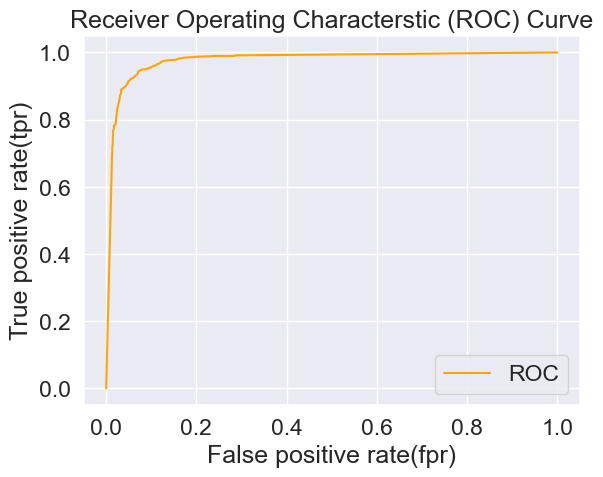

              precision    recall  f1-score   support

         0.0       0.94      0.93      0.93      1695
         1.0       0.93      0.94      0.94      1734

    accuracy                           0.94      3429
   macro avg       0.94      0.94      0.94      3429
weighted avg       0.94      0.94      0.94      3429



<Figure size 640x480 with 0 Axes>

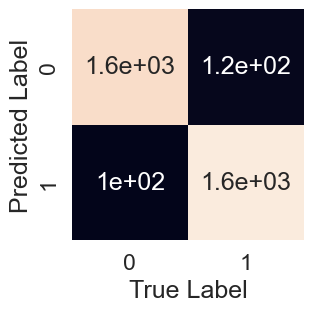

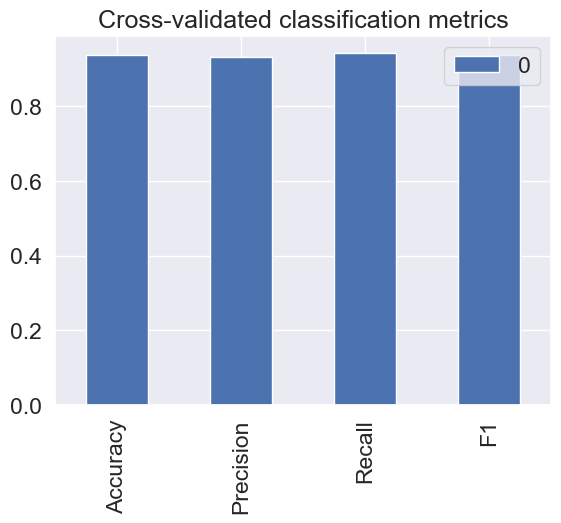

In [49]:
dtc=pickle.load(open("./final/DecisionTreeClassifier_HyperTuned.pkl","rb"))
metrics(dtc)

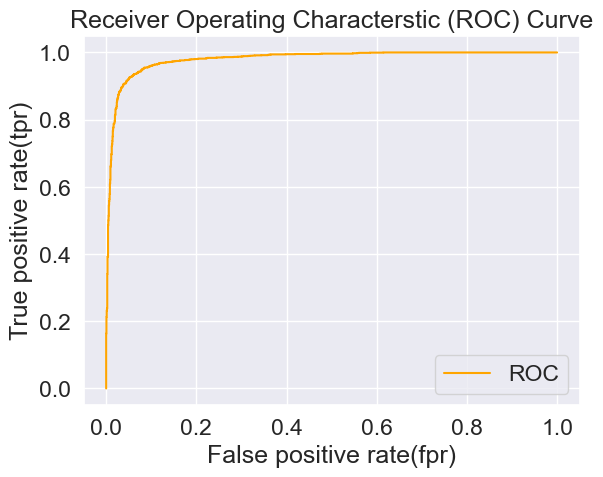

              precision    recall  f1-score   support

         0.0       0.94      0.92      0.93      1695
         1.0       0.93      0.94      0.94      1734

    accuracy                           0.93      3429
   macro avg       0.93      0.93      0.93      3429
weighted avg       0.93      0.93      0.93      3429



<Figure size 640x480 with 0 Axes>

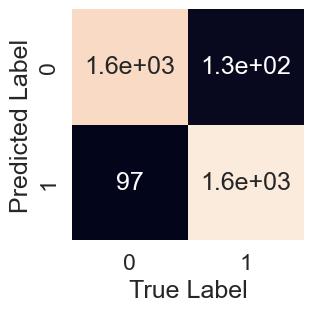

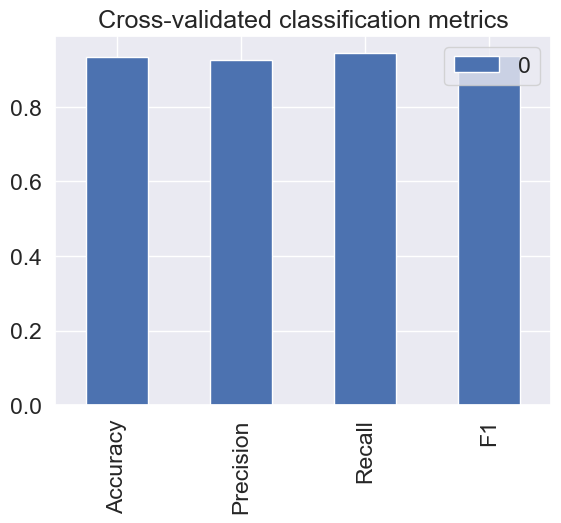

In [51]:
mlp=pickle.load(open("./final/MLPClassifier_HyperTuned.pkl","rb"))
metrics(mlp)

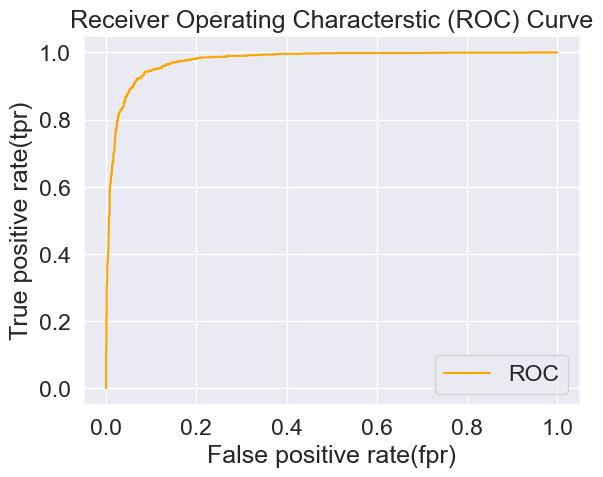

              precision    recall  f1-score   support

         0.0       0.93      0.92      0.92      1695
         1.0       0.92      0.93      0.93      1734

    accuracy                           0.92      3429
   macro avg       0.92      0.92      0.92      3429
weighted avg       0.92      0.92      0.92      3429



<Figure size 640x480 with 0 Axes>

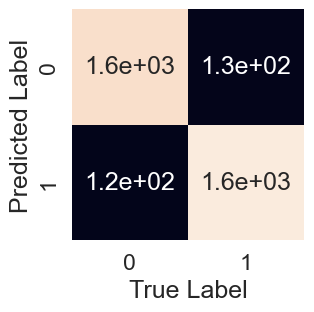

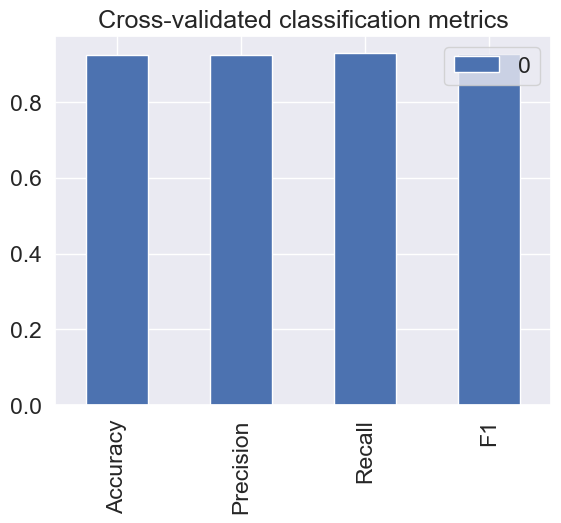

In [53]:
lr=pickle.load(open("./final/LogisticRegression_HyperTuned.pkl","rb"))
metrics(lr)

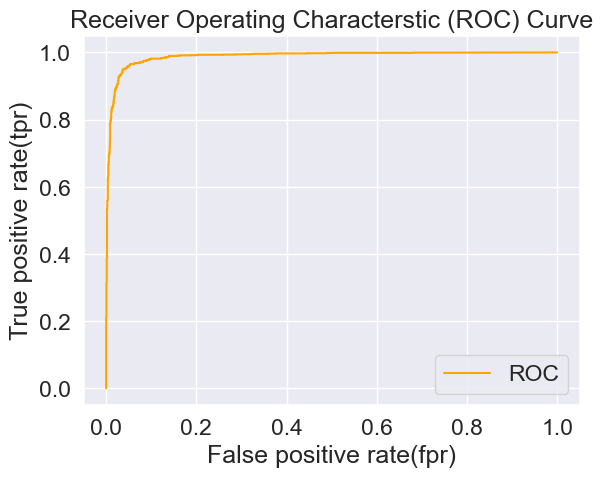

              precision    recall  f1-score   support

         0.0       0.96      0.95      0.95      1695
         1.0       0.95      0.96      0.96      1734

    accuracy                           0.96      3429
   macro avg       0.96      0.96      0.96      3429
weighted avg       0.96      0.96      0.96      3429



<Figure size 640x480 with 0 Axes>

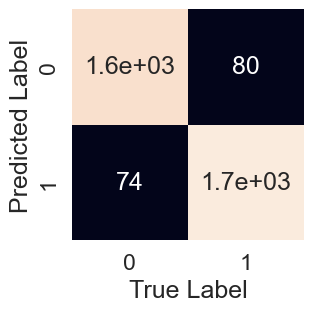

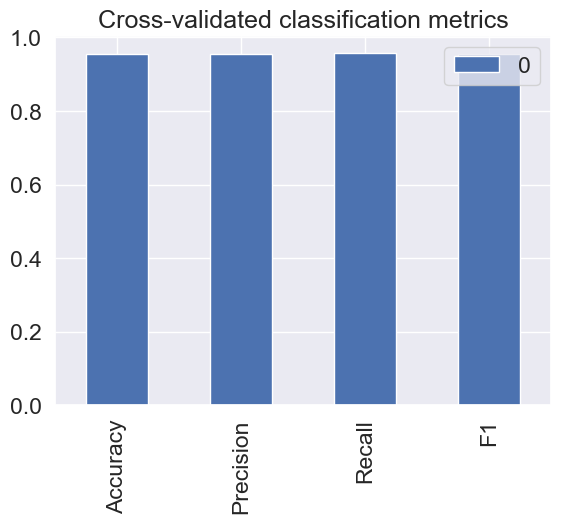

In [55]:
rf=pickle.load(open("./final/RandomForest_Hypertuned.pkl","rb"))
metrics(rf)

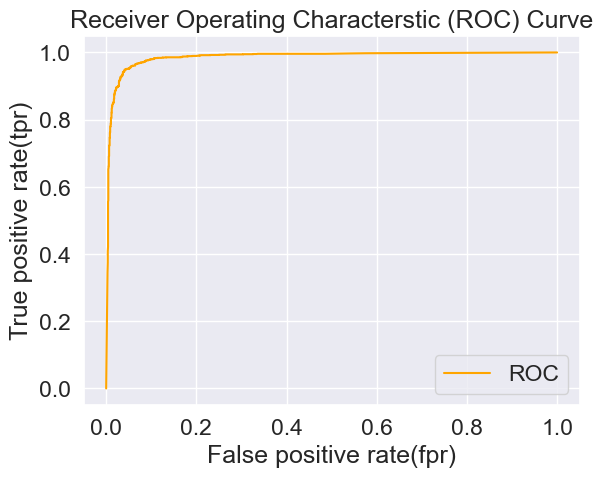

              precision    recall  f1-score   support

         0.0       0.95      0.95      0.95      1695
         1.0       0.95      0.95      0.95      1734

    accuracy                           0.95      3429
   macro avg       0.95      0.95      0.95      3429
weighted avg       0.95      0.95      0.95      3429



<Figure size 640x480 with 0 Axes>

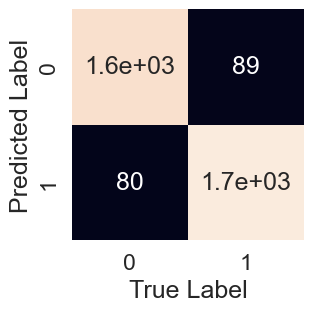

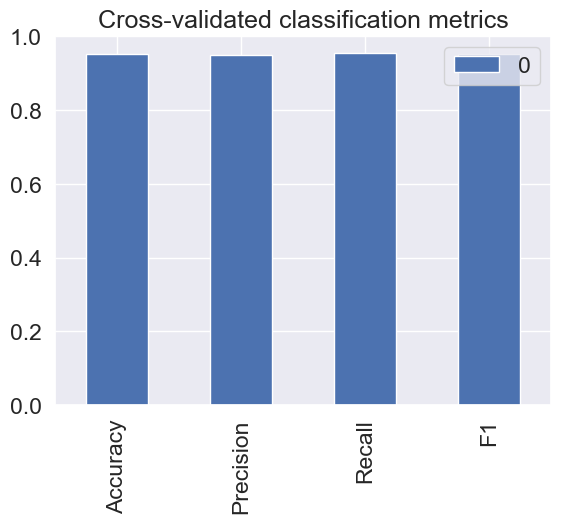

In [57]:
etc=pickle.load(open("./final/ExtraTreesClassifier_Hypertuned.pkl","rb"))
metrics(etc)

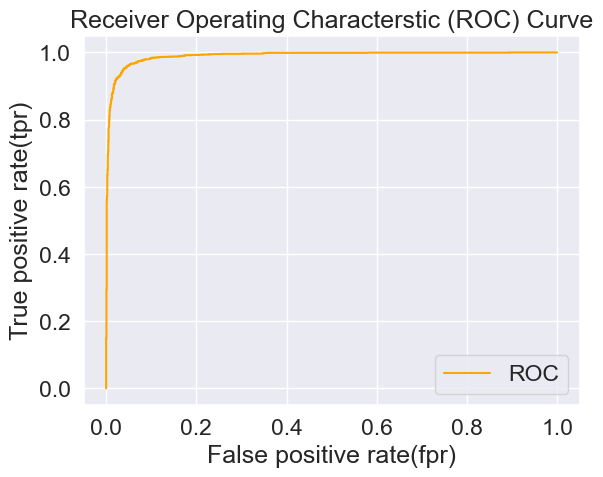

              precision    recall  f1-score   support

         0.0       0.96      0.95      0.95      1695
         1.0       0.95      0.96      0.96      1734

    accuracy                           0.96      3429
   macro avg       0.96      0.96      0.96      3429
weighted avg       0.96      0.96      0.96      3429



<Figure size 640x480 with 0 Axes>

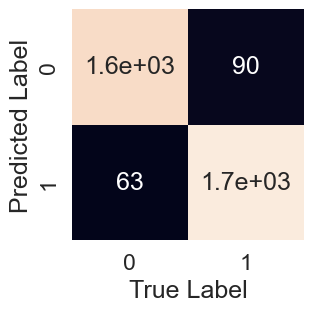

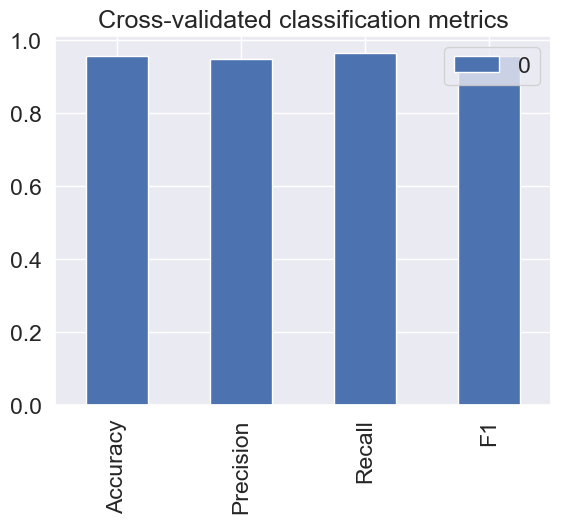

In [59]:
gbc=pickle.load(open("./final/GradientBoostingClassifier_Hypertuned.pkl","rb"))
metrics(gbc)

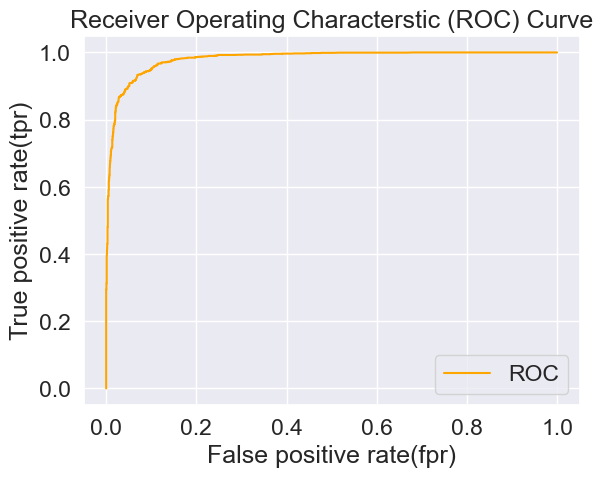

              precision    recall  f1-score   support

         0.0       0.93      0.92      0.93      1695
         1.0       0.93      0.93      0.93      1734

    accuracy                           0.93      3429
   macro avg       0.93      0.93      0.93      3429
weighted avg       0.93      0.93      0.93      3429



<Figure size 640x480 with 0 Axes>

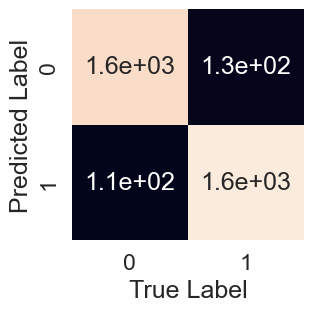

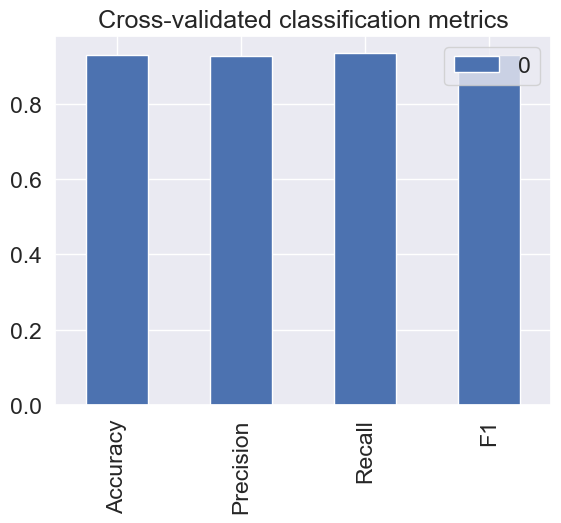

In [61]:
ada=pickle.load(open("./final/AdaBoostClassifier_Hypertuned.pkl","rb"))
metrics(ada)

# Ensemble to Create Hybrid

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score

# Create an ensemble model by combining individual models
ensemble_model = VotingClassifier(estimators=[('gbc', gbc), ('rf', rf)], voting='hard')

# Train the ensemble model
ensemble_model.fit(x_train, y_train)

# Make predictions on the testing set
y_pred = ensemble_model.predict(x_test)

# Calculate accuracy score of the ensemble model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the ensemble model: {accuracy:.2f}")

C:\Users\KIIT\Desktop\Minor-Project\env\lib\site-packages\sklearn\model_selection\_search.py:305: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 10 folds for each of 1 candidates, totalling 10 fits


C:\Users\KIIT\Desktop\Minor-Project\env\lib\site-packages\sklearn\model_selection\_search.py:305: UserWarning: The total space of parameters 1 is smaller than n_iter=30. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 10 folds for each of 1 candidates, totalling 10 fits
